[codebasics](https://www.youtube.com/watch?v=Wb2Tp35dZ-I&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=8&t=0s)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv("data/weather_by_cities.csv")
print(df)
print(df.shape)

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
4   1/1/2017    mumbai           90          5   Sunny
5   1/2/2017    mumbai           85         12     Fog
6   1/3/2017    mumbai           87         15     Fog
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
9   1/2/2017     paris           50         13  Cloudy
10  1/3/2017     paris           54          8  Cloudy
11  1/4/2017     paris           42         10  Cloudy
(12, 5)


<img src="img/group_by_cities.png">

In [3]:
g = df.groupby("city")
# print(g)
# print(dir(g))

# for city, df_city in g:
#     print(city)
#     print()
#     print(df_city) 
#     print()
    
print(g.get_group('mumbai'))

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain


<img src="img/split_apply_combine.png">

In [4]:
# print(g.max())
# print(g.min())
# print(g.mean())
print(g.std())

          temperature  windspeed
city                            
mumbai       3.109126   5.057997
new york     3.304038   2.708013
paris        5.315073   5.251984


In [5]:
#print(g.describe())
#print(g.size())
print(g.count())

          day  temperature  windspeed  event
city                                        
mumbai      4            4          4      4
new york    4            4          4      4
paris       4            4          4      4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

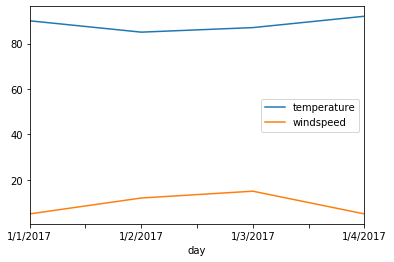

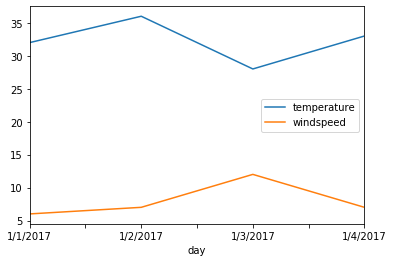

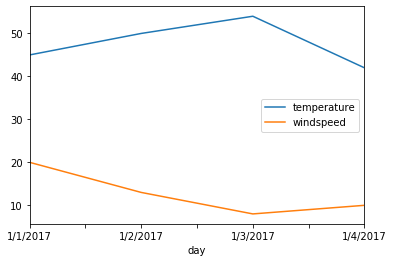

In [7]:
g.plot(x='day')

Erik_Marsja [youtube](https://www.youtube.com/watch?time_continue=146&v=Lp2aV_4LF48) [blog](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

    weight group
0     4.17  ctrl
1     5.58  ctrl
2     5.18  ctrl
3     6.11  ctrl
4     4.50  ctrl
5     4.61  ctrl
6     5.17  ctrl
7     4.53  ctrl
8     5.33  ctrl
9     5.14  ctrl
10    4.81  trt1
11    4.17  trt1
12    4.41  trt1
13    3.59  trt1
14    5.87  trt1
15    3.83  trt1
16    6.03  trt1
17    4.89  trt1
18    4.32  trt1
19    4.69  trt1
20    6.31  trt2
21    5.12  trt2
22    5.54  trt2
23    5.50  trt2
24    5.37  trt2
25    5.29  trt2
26    4.92  trt2
27    6.15  trt2
28    5.80  trt2
29    5.26  trt2


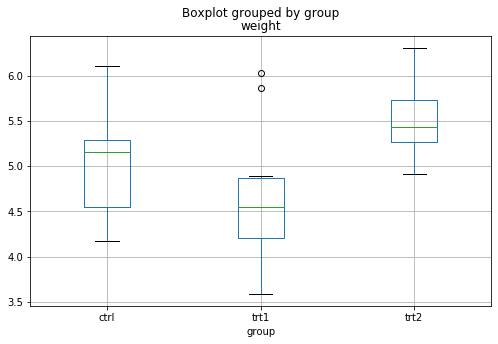

In [11]:
import pandas as pd

df = pd.read_csv("data/PlantGrowth.csv", usecols=[1, 2])
print(df)
df.boxplot('weight', by='group', figsize=(8, 5))

In [14]:
# notations are from https://en.wikipedia.org/wiki/One-way_analysis_of_variance

import pandas as pd
import numpy as np

J = len(pd.unique(df.group))  # number of treatments
I_j = df.groupby('group').size()[0] # participants in each condition
I = J * I_j  # participants times conditions

DF_Treatment = J - 1 
DF_Error = I - J 
DF_Total = I - 1

SS_Treatment = sum(df.groupby('group').sum()['weight']**2/I_j) \
    - (df['weight'].sum()**2)/I
SS_Error = np.sum(df['weight'].values**2) \
    - sum(df.groupby('group').sum()['weight']**2/I_j)
SS_Total = SS_Treatment + SS_Error 
print(SS_Treatment)
print(SS_Error)
print(SS_Total)

group
ctrl    10
trt1    10
trt2    10
dtype: int64
3.7663400000001275
10.492090000000076
14.258430000000203


<h4>Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups<h4>
<ol>
    <li>Days when temperature was between 80 and 90</li>
    <li>Days when it was between 50 and 60</li>
    <li>Days when it was anything else</li>
</ol>

For this you need to write custom grouping function and pass that to groupby

In [9]:
import pandas as pd

df = pd.read_csv("data/weather_by_cities.csv")

In [10]:
def grouper(df, col, idx):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [11]:
g = df.groupby(lambda x: grouper(df, 'temperature', x))
g

In [13]:
for key, df_key in g:
    print(key)
    print()
    print(df_key)
    print()

50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy

80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog

others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy

